#**Importing all libraries**

In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.0 MB 2.8 MB/s 


In [ ]:
!pip install peakutils

In [ ]:
import librosa

In [ ]:
!pip install librosa

In [ ]:
!pip install biosppy
from biosppy.signals import ecg

     |████████████████████████████████| 85 kB 1.8 MB/s 
  Created wheel for biosppy: filename=biosppy-0.7.3-py2.py3-none-any.whl size=95430 sha256=c7b0f0a449571e949381a106f52d4410358c12267535a0dd113b1d0db54e47ca
  Stored in directory: /root/.cache/pip/wheels/2f/4f/8f/28b2adc462d7e37245507324f4817ce1c64ef2464f099f4f0b
Successfully built biosppy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import pandas as pd 
import scipy
import math
from pandas import ExcelWriter
from pandas import ExcelFile
import neurokit2 as nk
import signal as si
from scipy import signal, special

In [ ]:
import scipy.io as sio 
from scipy.io import wavfile                
import peakutils                                # Librery to help in peak detection
from scipy.signal import hilbert, chirp,welch

In [ ]:
import librosa as lr
from librosa import display
import wave # library handles the parsing of WAV file headers
import pywt
import IPython.display as ipd #audio playback
## plot
import seaborn as sns
## others
from glob import glob
import itertools
import os
from IPython.display import Image
from skimage.transform import resize
import statistics as s

In [ ]:
from scipy.stats import kurtosis, skew
from scipy.fft import fft

In [ ]:
from scipy.stats import entropy

# **PRE-PROCESSING OF THE DATA:**



##Spike removal Algorithm:

In [ ]:
#Spike removal code
def spike_removal(X,f_rate):
 array=[[]]
 sampleframes=[]
 fs = f_rate
 a=1
 b=1
 window_size = round(fs/2)
 trailingsamples = len(pure)% window_size
 for r in range(1,round((len(pure)-trailingsamples)/window_size)+1):
  b=b+window_size
  sampleframes = np.reshape(pure[a:b],window_size,order = 'F')
  array.append(sampleframes)
  a=b
 MAAs = []
 for r in range(1,round((len(pure)-trailingsamples)/window_size)+1):
  b = array[r][:]
  c = np.max(b)
  MAAs.append(c)
 med = s.median(MAAs)
 n=1
 k=1
 while (n==1):
  MAAs = []
  for r in range(1,round((len(pure)-trailingsamples)/window_size)+1):
    b = array[r][:]
    c = np.max(b)
    MAAs.append(c)
  med = s.median(MAAs) 
  a=0
  for i in range(len(MAAs)):
   if(MAAs[i]>(3*med)):
      a=a+1    
  if(a==0):  
   n=0 
  else:
   m = max(MAAs)
   for i in range(len(MAAs)):
     if(MAAs[i]==m):
       m_index =i 
   window = array[(m_index+1)][:]
   p = window

   
   for i in range(len((p))):
     if(p[i]==m):
       a_index =i   
   #to find min index
   n=1
   i=1
   while(n==1):
     mi = a_index-i
     if(p[mi]<0):
       min_ind = mi
       n=0
     else:
       i = i+1
   #to find max index:
   n=1
   i=1
   while(n==1):
    if((a_index+i)< window_size):
     mi = a_index+i
     if(p[mi]<0):
       max_ind = mi
       n=0
     else:
       i = i+1
  
   p[min_ind:max_ind] = 0
   array[(m_index+1)][:] = p
   n=1
   k = k+1
   if (k==50):
       n=0

## getting back despiked signal
 p = np.concatenate(array,axis=0)
 c = []
 for i in range(len(p)):
  c.append(p[i])
 for i in range((len(pure)-trailingsamples),(len(pure))):
  c.append(pure[i])
 return c

#**HEART RATE - Springer algorithm**

In [ ]:
# Import Module
import os
  
# Folder Path
path = "/content/drive/MyDrive/training-a/"
  
# Change the directory
os.chdir(path)
  
# Read text File
  
  
def read_wav_file(file_path):
    Data = wave.open(file_path)
    return Data  

In [ ]:
#Reading the content of hea file
def read_hea_file(file_path):
  a = open(file_path)
  for index, line in enumerate(a):
    if(index==3):
      c = line
  return str(line[2:])

In [ ]:
def get_index(n,p):
  for i in range(len(n)):
   if(n[i]==p):
    index = i
  return index

In [ ]:
import math
## to find Heartrate and sys_time interval
def get_hsysrate(pure,f_rate):
  b,a = signal.butter(1,(2*8/f_rate),'low')
  am = (abs(scipy.signal.hilbert(pure)))
  c=[]
  for i in range(len(am)):
    ca = math.log(am[i])
    c.append(ca)

  cc = (signal.filtfilt(b,a,c))
  harmonic_env = []
  for i in range(len(cc)):
    a = math.exp(cc[i])
    harmonic_env.append(a)

  x =np.mean(harmonic_env)
  y=[]
  for i in range(len(harmonic_env)):
    y.append((harmonic_env[i]-x))

  p = np.correlate(y,y,mode='full')
  signal_auto_corr = p[len(harmonic_env)+1:]

  min_index = round(0.5*f_rate)
  max_index = round(2*f_rate)
  n = (signal_auto_corr[min_index:max_index])
  p = np.max(n)
  index = get_index(n,p)
  true_index = index+min_index-1
  heartRate = 60/(true_index/f_rate)

  max_sys_duration = round(((60/heartRate)*f_rate)/2);
  min_sys_duration = round(0.2*f_rate)
  a = signal_auto_corr[min_sys_duration:max_sys_duration]
  pa =np.max(a)
  indexx = get_index(a,pa)
  systolicTimeInterval = (min_sys_duration+indexx)/f_rate
  heart_cyc_du = (60/heartRate)
  dia_interval = heart_cyc_du - systolicTimeInterval

  return heartRate, systolicTimeInterval, heart_cyc_du, dia_interval

In [ ]:
#TO get heart rate and systolic interval
from scipy.io import wavfile
X = []
Sig_type = []
heart_rate = []
sys_interval = []
dia_interval = []
heart_cyc_du = []
sys_to_dia = []
sys_to_cyc = []
dia_to_cyc = []

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".hea"):
        file_path = f'{path}{file}'
        x=read_hea_file(file_path)
        Sig_type.append(x)
        file_path = f"{path}{file[:-3]}{'wav'}"
        # call read text file function
        Signal = read_wav_file(file_path)
        X.append(file)
        # reads all the frames 
        # -1 indicates all or max frames
        sig = Signal.readframes(-1)
        sig = np.frombuffer(sig, dtype ="int16")
        
         
        # gets the frame rate
        f_rate = Signal.getframerate()
        sample_rate, audio = wavfile.read(file_path)
        t = len(audio) / sample_rate

        time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )        

        ##Removing high frequency noise
        h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
        pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise
        l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')
        pure=signal.sosfilt(l_noise, pure_h)
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          b,c,d,e = get_hsysrate(pure,f_rate)
        else:
          denoised = spike_removal(pure,f_rate)

          b,c,d,e = get_hsysrate(denoised,f_rate) 
        heart_rate.append(b)
        sys_interval.append(c)
        heart_cyc_du.append(d)
        dia_interval.append(e)
        sys_to_dia.append((c/e))
        sys_to_cyc.append((c/d))
        dia_to_cyc.append((e/d))
        


#Creation of Dataframe
df_val = pd.DataFrame({'Sample_name': X,
                        'Type' : Sig_type,'Heart rate' : heart_rate,
                       'Systolic interval' : sys_interval,
                       'Diastolic interval' : dia_interval,
                       'Heart cycle duration' : heart_cyc_du,
                       'Ratio of sys to dia' : sys_to_dia,
                       'Ratio of sys to cycle' : sys_to_cyc,
                       'Ratio of dia to cycle': dia_to_cyc})
writer = ExcelWriter('Heart_rate.xlsx')
df_val.to_excel(writer,'Sheet1',index=True)
writer.save()

#**S1 Peak detection Algorithm**

In [ ]:
''' Derivate of an input signal as y[n]= x[n+1]- x[n-1] 
'''
def derivate (x):
	lenght=np.shape(x)				# Get the length of the vector		
	lenght=lenght[0];				# Get the value of the length
	y=np.zeros(lenght);				# Initializate derivate vector
	for i in range(lenght-1):
			y[i]=x[i+1]-x[i];		
	return y

In [ ]:

'''To normalized any vector\0-dimentional array in [-1,1] range, by divided the 
   vector by the maximun value of itself, substracting the mean value to the vector
   & dividing each value of the vector by the maximun value of itself 
'''
def vec_nor(x):
	lenght=np.shape(x)				# Get the length of the vector		
	lenght=lenght[0];				# Get the value of the length
	xMax=max(x);					# Get the maximun value of the vector
	nVec=np.zeros(lenght);			        # Initializate derivate vector
	for n in range(lenght):
		nVec[n]=x[n]/xMax;			
	nVec=nVec-np.mean(nVec);
	nVec=np.divide(nVec,np.max(nVec));
	return nVec

In [ ]:
'''
  FpassBand is the function that develop a pass band filter of the signal 'x' through the
  discrete convolution of this 'x' first with the coeficients of a High Pass Filter 'hp' and then
  with the discrete convolution of this result with a Low Pass Filter 'lp'
'''
def FpassBand(X,hp,lp):
        llp=np.shape(lp)	  	        # Get the length of the lowpass vector		
        llp=llp[0];				# Get the value of the length
        lhp=np.shape(hp)			# Get the length of the highpass vector		
        lhp=lhp[0];				# Get the value of the length	

        x=np.convolve(X,lp);		        # Disrete convolution 
        x=x[(llp//2):-1-(llp//2)];
        x=x-(np.mean(x));
        x=x/np.max(x);
	
        y=np.convolve(x,hp);			# Disrete onvolution
        y=y[(lhp//2):-1-(lhp//2)];
        y=y-np.mean(y);
        y=y/np.max(y);

        x=np.convolve(y,lp);		        # Disrete convolution 
        x=x[(llp//2):-1-(llp//2)];
        x=x-(np.mean(x));
        x=x/np.max(x);
	
        y=np.convolve(x,hp);			# Disrete onvolution
        y=y[(lhp//2):-1-(lhp//2)];
        y=y-np.mean(y);
        y=y/np.max(y);
        
        y=vec_nor(y);				# Vector Normalizing
        
        return y

In [ ]:

Xf=denoised; 	                # Apply a passband filter
Xf=vec_nor(Xf);			                # Vector Normalizing

  # Derivate of the Signal
dX=derivate(Xf);				# Derivate of the signal
dX=vec_nor(dX);					# Vector Normalizing

  # Square of the signal
dy=np.square(Xf);
dy=vec_nor(dy);

  # Peak Detection Process

size=np.shape(Xf)				# Rank or dimension of the array
fil=size[0];					# Number of rows

positive=np.zeros((1,fil+1));                   # Initializating Positives Values Vector 
positive=positive[0];                           # Getting the Vector

points=np.zeros((1,fil));                       # Initializating the all Peak Points Vector
points=points[0];                               # Getting the point vector

peaks=np.zeros((1,fil));                        # Initializating the s1-s1 Peak Vector
peaks=peaks[0];                                 # Getting the point vector
'''
  FIRST! having the positives values of the slope as 1
  And the negative values of the slope as 0
'''
for i in range(0,fil):
        if dX[i]>0:
                positive[i]=1;
        else:
                positive[i]=0;

'''
  SECOND! a peak will be found when the ith value is equal to 1 &&
  the ith+1 is equal to 0
'''
for i in range(0,fil):
        if (positive[i]==1 and positive[i+1]==0):
                points[i]=Xf[i];
        else:
                points[i]=0;

'''
  THIRD! Height & Distance Threshold using peakutils function
  Reference: https://pypi.python.org/pypi/PeakUtils/1.0.0
'''

indexes=peakutils.indexes(points,thres=0.05/max(points), min_dist=2000);
lenght=np.shape(indexes)			# Get the length of the index vector		
lenght=lenght[0];				# Get the value of the index vector

for i in range(0,lenght):
        p=indexes[i];
        peaks[p]=points[p];
        
n=np.arange(0,fil); 

s1_peaks =[]
for i in range(len(indexes)):
    m = indexes[i]
    p = pure[m]
    s1_peaks.append(p)
  
m = (min(s1_peaks))
mn = (np.mean(s1_peaks))
mm = max(s1_peaks)

s1_s1_interval = []
for i in range(len(indexes)-1):
    val = ((indexes[i+1]-indexes[i])/f_rate)
    s1_s1_interval.append(val)
s1 = (np.mean(s1_s1_interval))

  

In [ ]:
#TO get heart rate and systolic interval
from scipy.io import wavfile
X = []
Sig_type = []
S1_S1_inerval_avg = []
avg_S1_peak = []
max_S1_peak = []
min_S1_peak = []
max_min_r = []
max_avg_r = []
min_avg_r = []

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".hea"):
        file_path = f'{path}{file}'
        x=read_hea_file(file_path)
        Sig_type.append(x)
        file_path = f"{path}{file[:-3]}{'wav'}"
        # call read text file function
        Signal = read_wav_file(file_path)
        X.append(file)
        # reads all the frames 
        # -1 indicates all or max frames
        sig = Signal.readframes(-1)
        sig = np.frombuffer(sig, dtype ="int16")
        
         
        # gets the frame rate
        f_rate = Signal.getframerate()
        sample_rate, audio = wavfile.read(file_path)
        t = len(audio) / sample_rate

        time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )        

        ##Removing high frequency noise
        h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
        pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise
        l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')
        pure=signal.sosfilt(l_noise, pure_h)
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          a,b,c,d = getS1_peaks(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          a,b,c,d = getS1_peaks(denoised)
        S1_S1_inerval_avg.append(a)
        avg_S1_peak.append(b)
        min_S1_peak.append(c)
        max_S1_peak.append(d)
        max_min_r.append((d/c))
        max_avg_r.append((d/b))
        min_avg_r.append((c/b))
        


#Creation of Dataframe
df_val = pd.DataFrame({'Sample_name': X,
                        'Type' : Sig_type,
                       'Average S1_S1 interval' : S1_S1_inerval_avg,
                       'Min S1 peak value' : min_S1_peak,
                       'Maximum S1 peak value' : max_S1_peak,
                       'Average S1 peak value' : avg_S1_peak,
                       'Max to min' : max_min_r,
                       'Max to avg' : max_avg_r,
                       'min to avg' : min_avg_r})
writer = ExcelWriter('S1_S1.xlsx')
df_val.to_excel(writer,'Sheet1',index=True)
writer.save()

#Basic features

In [ ]:
def getfeat(X):
  fft_val = fft(X)
  a = np.mean(fft_val)
  b = np.mean(abs(fft_val))
  x= skew(X)
  y = kurtosis(X) 
  z = entropy(X)
  return a,b,x,y,z

In [ ]:
#TO get heart rate and systolic interval
from scipy.io import wavfile
X = []
Sig_type = []
fft_avg = []
fft_abs_mean = []
skewness = []
kurt = []
ent = []

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".hea"):
        file_path = f'{path}{file}'
        x=read_hea_file(file_path)
        Sig_type.append(x)
        file_path = f"{path}{file[:-3]}{'wav'}"
        # call read text file function
        Signal = read_wav_file(file_path)
        X.append(file)
        # reads all the frames 
        # -1 indicates all or max frames
        sig = Signal.readframes(-1)
        sig = np.frombuffer(sig, dtype ="int16")
        
         
        # gets the frame rate
        f_rate = Signal.getframerate()
        sample_rate, audio = wavfile.read(file_path)
        t = len(audio) / sample_rate

        time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )        

        ##Removing high frequency noise
        h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
        pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise
        l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')
        pure=signal.sosfilt(l_noise, pure_h)
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          a,b,c,d,e = getfeat(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          a,b,c,d,e = getfeat(denoised)
        fft_avg.append(a)
        fft_abs_mean.append(b)
        skewness.append(c)
        kurt.append(d)
        ent.append(e)
        


#Creation of Dataframe
df_val = pd.DataFrame({'Sample_name': X,
                        'Type' : Sig_type,
                       'Avg fft val' : fft_avg,
                       'Avg abs fft' : fft_abs_mean,
                       'Skewness' : skewness,
                       'Kurtosis' : kurt,
                       'Entropy' : ent})

writer = ExcelWriter('Basic features.xlsx')
df_val.to_excel(writer,'Sheet1',index=True)
writer.save()

#**PSD Analysis**

In [ ]:
## to find corresponding frequencies index
def f(X, y):
  if(y=="min"):
    m=np.min(X)
  else:
    m=np.max(X)
  for i in range(len(X)):
    if(X[i]==m):
      v = i
      break;
  return v

In [ ]:
import statistics as s
## to find PSD, minmum value and maximum values of PSDs and their corresponidng frequencies
def PSD(X):
  freqs, psd = signal.welch(X)
  mini=np.min(psd)
  mini_f = freqs[f(psd,"min")]
  maxm = max(psd)
  maxm_f = freqs[f(psd,"max")]
  mean = s.mean(psd)
  sd = np.std(psd)
  return mini,mini_f,maxm,maxm_f,mean,sd

In [ ]:
from scipy.io import wavfile
X = []
Sig_type = []
mean_PSD_org = []
sd_PSD_org = []
Max_PSD_org = []
Max_PSD_f_org = []
Max_PSD_s1= []
Max_PSD_f_s1 = []
mean_PSD_s1 = []
sd_PSD_s1 = []
Max_PSD_s2 = []
Max_PSD_f_s2 = []
mean_PSD_s2 = []
sd_PSD_s2 = []
Max_PSD_s3 = []
Max_PSD_f_s3 = []
mean_PSD_s3 = []
sd_PSD_s3 = []
Max_PSD_s4 = []
Max_PSD_f_s4 = []
mean_PSD_s4 = []
sd_PSD_s4 = []
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
 if file.endswith(".hea"):
        file_path = f'{path}{file}'
        x=read_hea_file(file_path)
        Sig_type.append(x)
        file_path = f"{path}{file[:-3]}{'wav'}"
        # call read text file function
        Signal = read_wav_file(file_path)
        X.append(file)
        # reads all the frames 
        # -1 indicates all or max frames
        sig = Signal.readframes(-1)
        sig = np.frombuffer(sig, dtype ="int16")
        
         
        # gets the frame rate
        f_rate = Signal.getframerate()
        sample_rate, audio = wavfile.read(file_path)
        t = len(audio) / sample_rate

        time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )        

        ##Removing high frequency noise
        h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
        pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise
        l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')
        pure=signal.sosfilt(l_noise, pure_h)
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(denoised)
        
        Max_PSD_org.append(maxm)
        Max_PSD_f_org.append(maxm_f)
        mean_PSD_org.append(mean)
        sd_PSD_org.append(sd)

        ##Filtering for the range of s1
        so_1 = signal.butter(1, [30,100], 'bandpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s1 = signal.sosfilt(so_1,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s1)
        else:
          s1 = signal.sosfilt(so_1,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s1)

        Max_PSD_s1.append(maxm)
        Max_PSD_f_s1.append(maxm_f)
        mean_PSD_s1.append(mean)
        sd_PSD_s1.append(sd)
            
        ##Filtering for the range of s2
        so_2 = signal.butter(2, 100, 'highpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s2 = signal.sosfilt(so_2,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s2)
        else:
          s2 = signal.sosfilt(so_2,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s2)
      
        Max_PSD_s2.append(maxm)
        Max_PSD_f_s2.append(maxm_f)
        mean_PSD_s2.append(mean)
        sd_PSD_s2.append(sd)
        
        ##Filtering for the range of s3
        so_3 = signal.butter(1, [20,25], 'bandpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s3 = signal.sosfilt(so_3,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s3)
        else:
          s3 = signal.sosfilt(so_3,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s3)
   
        Max_PSD_s3.append(maxm)
        Max_PSD_f_s3.append(maxm_f)
        mean_PSD_s3.append(mean)
        sd_PSD_s3.append(sd)
          
        ##Filtering for the range of s4
        so_4 = signal.butter(2, 30, 'low', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s4 = signal.sosfilt(so_4,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s4)
        else:
          s4 = signal.sosfilt(so_4,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s4)
       
        Max_PSD_s4.append(maxm)
        Max_PSD_f_s4.append(maxm_f) 
        mean_PSD_s4.append(mean)
        sd_PSD_s4.append(sd)

#Creation of Dataframe
df_val = pd.DataFrame({ 'Sample_name': X,
                        'Type' : Sig_type,
                       
                     
                       'Max_PSD_org' : Max_PSD_org,
                       'Max_PSD_f_org' : Max_PSD_f_org,
                       'Mean_PSD_org' : mean_PSD_org,
                       'SD_PSD_org' : sd_PSD_org,
                       
                       'Max_PSD_s1' : Max_PSD_s1,
                       'Max_PSD_f_s1' : Max_PSD_f_s1,
                       'Mean_PSD_s1' : mean_PSD_s1,
                       'SD_PSD_s1' : sd_PSD_s1,
                     
                       'Max_PSD_s2' : Max_PSD_s2,
                       'Max_PSD_f_s2' : Max_PSD_f_s2,
                       'Mean_PSD_s2' : mean_PSD_s2,
                       'SD_PSD_s2' : sd_PSD_s2,
                      
                       'Max_PSD_s3' : Max_PSD_s3,
                       'Max_PSD_f_s3' : Max_PSD_f_s3,
                       'Mean_PSD_s3' : mean_PSD_s3,
                       'SD_PSD_s3' : sd_PSD_s3,
                    
                       'Max_PSD_s4' : Max_PSD_s4,
                       'Max_PSD_f_s4' : Max_PSD_f_s4,
                       'Mean_PSD_s4' : mean_PSD_s4,
                       'SD_PSD_s4' : sd_PSD_s4
    
})


writer = ExcelWriter('PSD_Analysis.xlsx')
df_val.to_excel(writer,'Sheet1',index=True)
writer.save()

## MFCC features:

In [ ]:
def getmfcc(X,f):
  mfcc = librosa.feature.mfcc(y = x, sr = f, n_mfcc = 12)
  fea = []
  for i in range(len(mfcc)):
    a = mfcc[i]
    b = np.mean(a)
    fea.append(b) 
  return fea

#All in One

In [ ]:
#TO get heart rate and systolic interval
from scipy.io import wavfile
X = []
Sig_type = []
heart_rate = []
sys_interval = []
dia_interval = []
heart_cyc_du = []
sys_to_dia = []
sys_to_cyc = []
dia_to_cyc = []
S1_S1_inerval_avg = []
avg_S1_peak = []
max_S1_peak = []
min_S1_peak = []
max_min_r = []
max_avg_r = []
min_avg_r = []
fft_avg = []
fft_abs_mean = []
skewness = []
kurt = []
mean_PSD_org = []
sd_PSD_org = []
Max_PSD_org = []
Max_PSD_f_org = []
Max_PSD_s1= []
Max_PSD_f_s1 = []
mean_PSD_s1 = []
sd_PSD_s1 = []
Max_PSD_s2 = []
Max_PSD_f_s2 = []
mean_PSD_s2 = []
sd_PSD_s2 = []
Max_PSD_s3 = []
Max_PSD_f_s3 = []
mean_PSD_s3 = []
sd_PSD_s3 = []
Max_PSD_s4 = []
Max_PSD_f_s4 = []
mean_PSD_s4 = []
sd_PSD_s4 = []
mfcc1 = []
mfcc2 = []
mfcc3 = []
mfcc4 = []
mfcc5 = []
mfcc6 = []
mfcc7 = []
mfcc8 = []
mfcc9 = []
mfcc10 = []
mfcc11 = []
mfcc12 = []

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".hea"):
        file_path = f'{path}{file}'
        x=read_hea_file(file_path)
        Sig_type.append(x)
        file_path = f"{path}{file[:-3]}{'wav'}"
        # call read text file function
        Signal = read_wav_file(file_path)
        X.append(file)
        # reads all the frames 
        # -1 indicates all or max frames
        sig = Signal.readframes(-1)
        sig = np.frombuffer(sig, dtype ="int16")
        
         
        # gets the frame rate
        f_rate = Signal.getframerate()
        sample_rate, audio = wavfile.read(file_path)
        t = len(audio) / sample_rate

        time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )        

        ##Removing high frequency noise
        h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
        pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise
        l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')
        pure=signal.sosfilt(l_noise, pure_h)
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          b,c,d,e = get_hsysrate(pure,f_rate)
        else:
          denoised = spike_removal(pure,f_rate)

          b,c,d,e = get_hsysrate(denoised,f_rate) 
        heart_rate.append(b)
        sys_interval.append(c)
        heart_cyc_du.append(d)
        dia_interval.append(e)
        sys_to_dia.append((c/e))
        sys_to_cyc.append((c/d))
        dia_to_cyc.append((e/d))

        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          a,b,c,d = getS1_peaks(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          a,b,c,d = getS1_peaks(denoised)
        S1_S1_inerval_avg.append(a)
        avg_S1_peak.append(b)
        min_S1_peak.append(c)
        max_S1_peak.append(d)
        max_min_r.append((d/c))
        max_avg_r.append((d/b))
        min_avg_r.append((c/b))

        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          a,b,c,d,e = getfeat(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          a,b,c,d,e = getfeat(denoised)
        fft_avg.append(a)
        fft_abs_mean.append(b)
        skewness.append(c)
        kurt.append(d)
        

        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(pure)
        else:
          denoised = spike_removal(pure,f_rate)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(denoised)
        
        Max_PSD_org.append(maxm)
        Max_PSD_f_org.append(maxm_f)
        mean_PSD_org.append(mean)
        sd_PSD_org.append(sd)

        ##Filtering for the range of s1
        so_1 = signal.butter(1, [30,100], 'bandpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s1 = signal.sosfilt(so_1,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s1)
        else:
          s1 = signal.sosfilt(so_1,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s1)

        Max_PSD_s1.append(maxm)
        Max_PSD_f_s1.append(maxm_f)
        mean_PSD_s1.append(mean)
        sd_PSD_s1.append(sd)
            
        ##Filtering for the range of s2
        so_2 = signal.butter(2, 100, 'highpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s2 = signal.sosfilt(so_2,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s2)
        else:
          s2 = signal.sosfilt(so_2,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s2)
      
        Max_PSD_s2.append(maxm)
        Max_PSD_f_s2.append(maxm_f)
        mean_PSD_s2.append(mean)
        sd_PSD_s2.append(sd)
        
        ##Filtering for the range of s3
        so_3 = signal.butter(1, [20,25], 'bandpass', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s3 = signal.sosfilt(so_3,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s3)
        else:
          s3 = signal.sosfilt(so_3,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s3)
   
        Max_PSD_s3.append(maxm)
        Max_PSD_f_s3.append(maxm_f)
        mean_PSD_s3.append(mean)
        sd_PSD_s3.append(sd)
          
        ##Filtering for the range of s4
        so_4 = signal.butter(2, 30, 'low', fs=2000, output='sos')
        if((file == 'a0305.hea') or (file == 'a0045.hea') or (file == 'a0304.hea') or (file == 'a0184.hea')):
          s4 = signal.sosfilt(so_4,pure)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s4)
        else:
          s4 = signal.sosfilt(so_4,denoised)
          mini,mini_f,maxm,maxm_f,mean,sd = PSD(s4)
       
        Max_PSD_s4.append(maxm)
        Max_PSD_f_s4.append(maxm_f) 
        mean_PSD_s4.append(mean)
        sd_PSD_s4.append(sd)
        
       
        mfcc = librosa.feature.mfcc(y = pure, sr = f_rate, n_mfcc = 12)
        p = []
        for i in range(len(mfcc)):
           a = mfcc[i]
           b = np.mean(a)
           p.append(b)
        mfcc1.append(p[0])
        mfcc2.append(p[1])
        mfcc3.append(p[2])
        mfcc4.append(p[3])
        mfcc5.append(p[4])
        mfcc6.append(p[5])
        mfcc7.append(p[6])
        mfcc8.append(p[7])
        mfcc9.append(p[8])
        mfcc10.append(p[9])
        mfcc11.append(p[10])
        mfcc12.append(p[11])


 
        


#Creation of Dataframe
df_val = pd.DataFrame({'Sample_name': X,
                        'Type' : Sig_type,'Heart rate' : heart_rate,
                       'Systolic interval' : sys_interval,
                       'Diastolic interval' : dia_interval,
                       'Heart cycle duration' : heart_cyc_du,
                       'Ratio of sys to dia' : sys_to_dia,
                       'Ratio of sys to cycle' : sys_to_cyc,
                       'Ratio of dia to cycle': dia_to_cyc,
                       'Average S1_S1 interval' : S1_S1_inerval_avg,
                       'Min S1 peak value' : min_S1_peak,
                       'Maximum S1 peak value' : max_S1_peak,
                       'Average S1 peak value' : avg_S1_peak,
                       'Max to min' : max_min_r,
                       'Max to avg' : max_avg_r,
                       'min to avg' : min_avg_r,
                       'Avg fft val' : fft_avg,
                       'Avg abs fft' : fft_abs_mean,
                       'Skewness' : skewness,
                       'Kurtosis' : kurt,
                       'Max_PSD_org' : Max_PSD_org,
                       'Max_PSD_f_org' : Max_PSD_f_org,
                       'Mean_PSD_org' : mean_PSD_org,
                       'SD_PSD_org' : sd_PSD_org,
                       
                       'Max_PSD_s1' : Max_PSD_s1,
                       'Max_PSD_f_s1' : Max_PSD_f_s1,
                       'Mean_PSD_s1' : mean_PSD_s1,
                       'SD_PSD_s1' : sd_PSD_s1,
                     
                       'Max_PSD_s2' : Max_PSD_s2,
                       'Max_PSD_f_s2' : Max_PSD_f_s2,
                       'Mean_PSD_s2' : mean_PSD_s2,
                       'SD_PSD_s2' : sd_PSD_s2,
                      
                       'Max_PSD_s3' : Max_PSD_s3,
                       'Max_PSD_f_s3' : Max_PSD_f_s3,
                       'Mean_PSD_s3' : mean_PSD_s3,
                       'SD_PSD_s3' : sd_PSD_s3,
                    
                       'Max_PSD_s4' : Max_PSD_s4,
                       'Max_PSD_f_s4' : Max_PSD_f_s4,
                       'Mean_PSD_s4' : mean_PSD_s4,
                       'SD_PSD_s4' : sd_PSD_s4,
                       'MFCC1_org' : mfcc1,
                       'MFCC2_org' : mfcc2,
                       'MFCC3_org' : mfcc3,
                       'MFCC4_org' : mfcc4,
                       'MFCC5_org' : mfcc5,
                       'MFCC6_org' : mfcc6,
                       'MFCC7_org' : mfcc7,
                       'MFCC8_org' : mfcc8,
                       'MFCC9_org' : mfcc9,
                       'MFCC10_org' : mfcc10,
                       'MFCC11_org' : mfcc11,
                       'MFCC12_org' : mfcc12
                       })
writer = ExcelWriter('DATASET.xlsx')
df_val.to_excel(writer,'Sheet1',index=True)
writer.save()

#Graphs:

In [ ]:
Signal = wave.open('/content/drive/MyDrive/training-a/a0345.wav')
sig = Signal.readframes(-1) 
sig = np.frombuffer(sig, dtype ="int16")

         
# gets the frame rate
f_rate = Signal.getframerate()
    
      
time = np.linspace(
        0, # start
        len(sig) / f_rate,
        num = len(sig)
        )       
t = len(sig) / f_rate       

        ##Removing high frequency noise        
h_noise = signal.butter(10,600, 'lowpass', fs=2000 ,output = 'sos')
pure_h=signal.sosfilt(h_noise, sig)
        ##Removing very low frequency noise        
l_noise = signal.butter(10,10, 'highpass', fs=2000 ,output = 'sos')        
pure=signal.sosfilt(l_noise, pure_h)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'Amplitude')

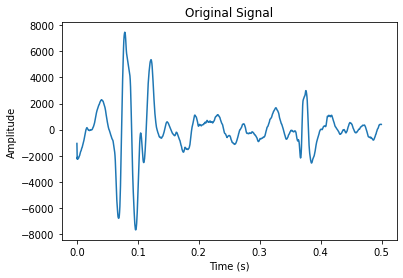

In [ ]:
plt.plot(time[0:1000],sig[0:1000])
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

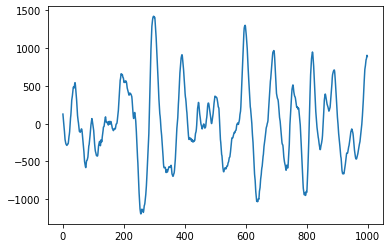

In [ ]:
plt.plot(pure[1000:2000])

In [ ]:
denoised = spike_removal(pure,f_rate)

Text(0, 0.5, 'Amplitude')

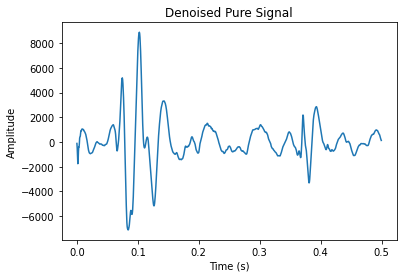

In [ ]:
plt.plot(time[0:1000],denoised[0:1000])
plt.title('Denoised Pure Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [ ]:
a,b,c,d = getS1_peaks(denoised)

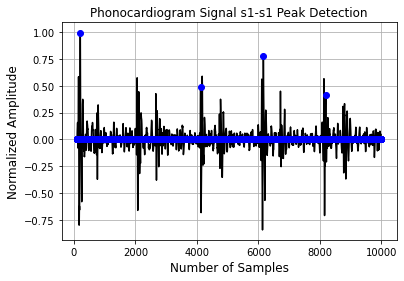

In [ ]:
plt.figure(1)
plt.plot(n[100:10000],Xf[100:10000],'k',n[100:10000],peaks[100:10000],'bo')
plt.ylabel('Normalized Amplitude',fontsize=12)
plt.xlabel('Number of Samples',fontsize=12)
plt.title('Phonocardiogram Signal s1-s1 Peak Detection')
plt.grid(True)
plt.show()

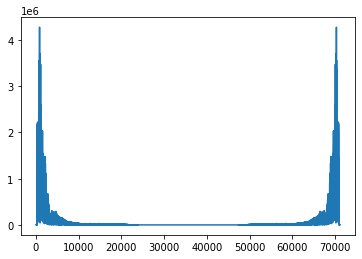

Text(0, 0.5, 'Amplitude')

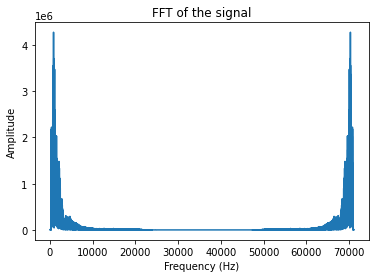

In [ ]:
fft_val = fft(denoised)
plt.plot(abs(fft_val))
plt.title('FFT of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')


Text(0, 0.5, 'Power')

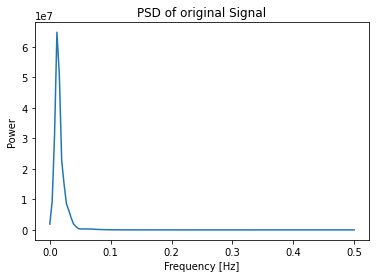

In [ ]:
freqs, psd = signal.welch(denoised)
plt.plot(freqs, psd)
plt.title('PSD of original Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')